# Problem Set 1

In [38]:
# imports
import numpy as np
from scipy.ndimage import uniform_filter1d
from matplotlib import pyplot as plt
import pandas
from datetime import datetime, timedelta

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [44]:
def set_fontsize(ax,fsz):
    """
    Set the fontsize throughout an Axis
    
    Args:
        ax (Matplotlib Axis): 
        fsz (float): Font size

    Returns:

    """
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fsz)


# Question 1

## Load data

In [36]:
data = pandas.read_table('../Data/greenland_mass_200204_202201.txt', 
                         delim_whitespace=True,
                         skiprows=31,
                       names=['decyear', 'mass', 'emass'])

In [37]:
data.head()

,decyear,mass,emass
0,2002.29,0.00,134.28
1,2002.35,63.75,70.59
2,2002.62,-219.60,53.36
3,2002.71,-239.18,64.95
4,2002.79,-210.20,39.05


## Datetime

In [39]:
dates = []

for start in data.decyear:
    #start = 2002.29
    year = int(start)
    rem = start - year

    base = datetime(year, 1, 1)
    result = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    dates.append(result)
dates[0:5]

[datetime.datetime(2002, 4, 16, 20, 23, 59, 999999),
 datetime.datetime(2002, 5, 8, 17, 59, 59, 999997),
 datetime.datetime(2002, 8, 15, 7, 11, 59, 999997),
 datetime.datetime(2002, 9, 17, 3, 36, 0, 1),
 datetime.datetime(2002, 10, 16, 8, 23, 59, 999999)]

In [40]:
data['date'] = dates

In [41]:
data.set_index('date', inplace=True)

In [42]:
data.head()

,decyear,mass,emass
date,,,
2002-04-16 20:23:59.999999,2002.29,0.00,134.28
2002-05-08 17:59:59.999997,2002.35,63.75,70.59
2002-08-15 07:11:59.999997,2002.62,-219.60,53.36
2002-09-17 03:36:00.000001,2002.71,-239.18,64.95
2002-10-16 08:23:59.999999,2002.79,-210.20,39.05


## Plot

<Figure size 432x288 with 0 Axes>

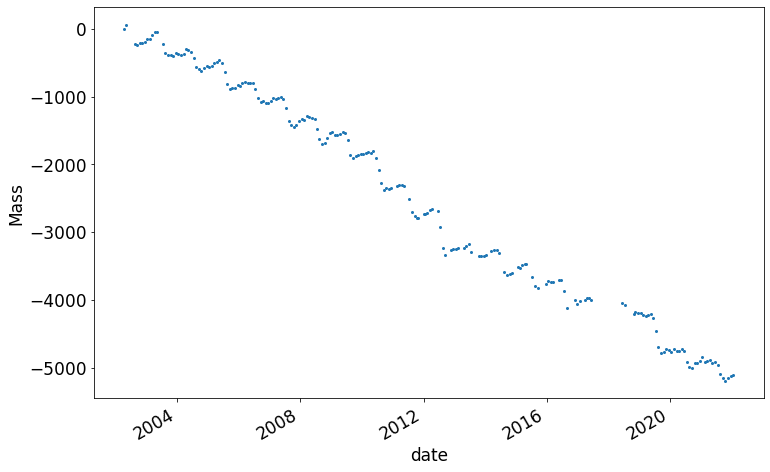

In [59]:
plt.clf()
fig = plt.figure(figsize=(12,8))
ax = data.mass.plot(marker='o', ls='', ms=2)
# Label
ax.set_ylabel('Mass')
set_fontsize(ax,17)
plt.savefig('Problem1_timeseries.png', dpi=300)
plt.show()

# Problem 2 -- Decompose

In [46]:
result = seasonal_decompose(data.mass, model='additive', period=12)

## Plot

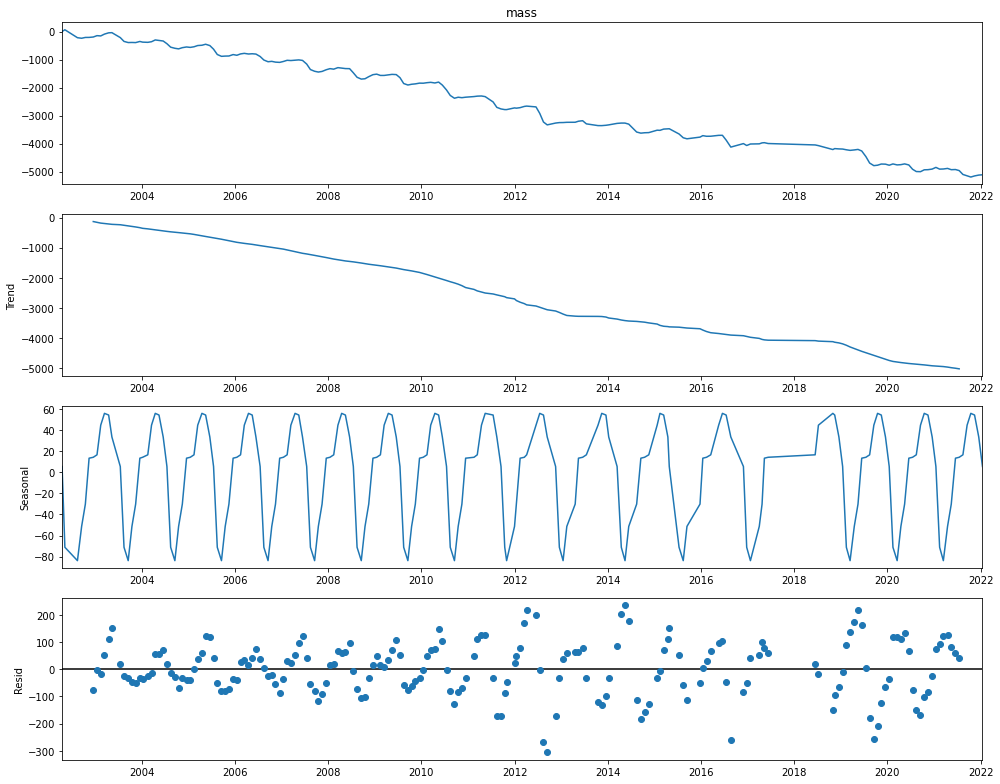

In [58]:
fig = result.plot()
fig.set_size_inches((14, 11))
# Tight layout to realign things
fig.tight_layout()
plt.savefig('Problem2_decompose.png', dpi=300)
plt.show()

# Problem 3 -- Description

## The trend is relatively linear, it is not grossly exponential.

## There is a strong seasonal component of approximaely 150 gt variation, peak-to-peak over the course of a year.  There is also an unusual 'hitch' during the first few months of the year.  There is an apparent seasonal variation to the residuals too, i.e. these two components "interact"

## The variance in the remainder increases during the first ~10 years and then appears relatively constant afterwards.



----

# Problem 4 -- Berkeley monthly

## Load

In [61]:
globalT = pandas.read_table('../Data/LOT_berkeley_1850_2021_monthly.txt',
                         delim_whitespace=True,
                         skiprows=85, 
                         names = ['Year', 'Month',  'AnomalyM', 'Unc.M',   'AnomalyA', 'Unc.A',   
                                  'Anomaly5', 'Unc.5',   'Anomaly10',  'Unc.10',   'Anomaly20', 'Unc.20']
                           )
globalT.head()

,Year,Month,AnomalyM,Unc.M,AnomalyA,Unc.A,Anomaly5,Unc.5,Anomaly10,Unc.10,Anomaly20,Unc.20
0,1850,1,-0.760,0.435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.207,0.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.370,0.353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.605,0.284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.632,0.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dates

In [63]:
dates = []
for index, row in globalT.iterrows():
    dates.append(f'{int(row.Year)}-{int(row.Month)}')
dates = pandas.to_datetime(dates)
globalT['date'] = dates
globalT.set_index('date', inplace=True)
globalT.head()

,Year,Month,AnomalyM,Unc.M,AnomalyA,Unc.A,Anomaly5,Unc.5,Anomaly10,Unc.10,Anomaly20,Unc.20
date,,,,,,,,,,,,
1850-01-01,1850,1,-0.760,0.435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-02-01,1850,2,-0.207,0.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-03-01,1850,3,-0.370,0.353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-04-01,1850,4,-0.605,0.284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-05-01,1850,5,-0.632,0.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Time series

<Figure size 432x288 with 0 Axes>

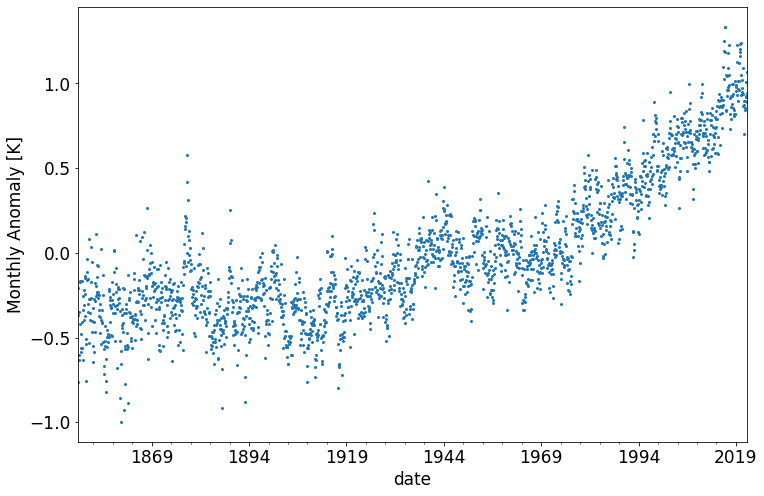

In [66]:
plt.clf()
fig = plt.figure(figsize=(12,8))
ax = globalT.AnomalyM.plot(marker='o', ls='', ms=2)
# Label
ax.set_ylabel('Monthly Anomaly [K]')
set_fontsize(ax,17)
#plt.savefig('Problem1_timeseries.png', dpi=300)
plt.show()

## 10 year filter

In [72]:
filt_data = uniform_filter1d(globalT.AnomalyM, size=12*10)
globalT['filter10'] = filt_data

In [73]:
globalT.filter10

date
1850-01-01   -0.333683
1850-02-01   -0.332250
1850-03-01   -0.331525
1850-04-01   -0.334675
1850-05-01   -0.333217
                ...   
2021-08-01    0.963858
2021-09-01    0.963400
2021-10-01    0.964425
2021-11-01    0.966608
2021-12-01    0.968433
Name: filter10, Length: 2064, dtype: float64

## Plot

<Figure size 432x288 with 0 Axes>

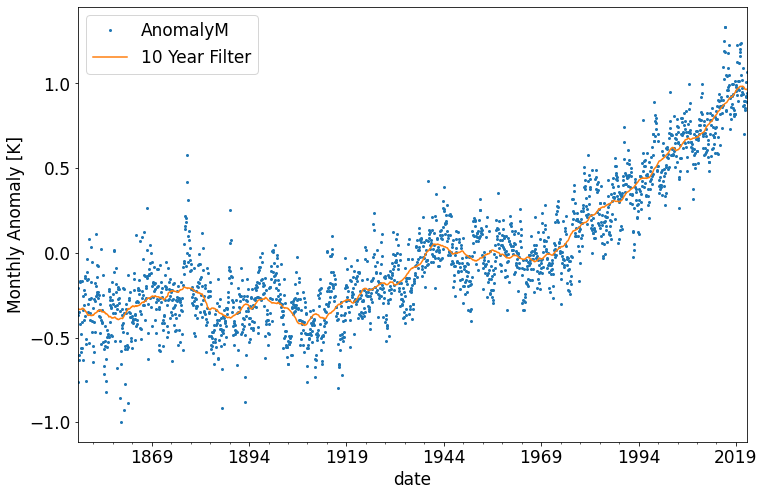

In [128]:
plt.clf()
fig = plt.figure(figsize=(12,8))
# Time series
ax = globalT.AnomalyM.plot(marker='o', ls='', ms=2)

# 10 year
globalT.filter10.plot(ax=ax, label='10 Year Filter')

# Label
ax.set_ylabel('Monthly Anomaly [K]')
set_fontsize(ax,17)
ax.legend(fontsize=17)
plt.savefig('Problem4_10year.png', dpi=300)
plt.show()

# Problem 5 -- Other filters

## Filter

In [78]:
for nyear in [2,5,20]:
    filt_data = uniform_filter1d(globalT.AnomalyM, size=12*nyear)
    globalT[f'filter{nyear}'] = filt_data

In [79]:
globalT.head()

,Year,Month,AnomalyM,Unc.M,AnomalyA,Unc.A,Anomaly5,Unc.5,Anomaly10,Unc.10,Anomaly20,Unc.20,filter10,filter2,filter5,filter20
date,,,,,,,,,,,,,,,,
1850-01-01,1850,1,-0.760,0.435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.333683,-0.443250,-0.385800,-0.345975
1850-02-01,1850,2,-0.207,0.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.332250,-0.430125,-0.384533,-0.346979
1850-03-01,1850,3,-0.370,0.353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.331525,-0.423542,-0.387750,-0.347496
1850-04-01,1850,4,-0.605,0.284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.334675,-0.422583,-0.383817,-0.349367
1850-05-01,1850,5,-0.632,0.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.333217,-0.431292,-0.373783,-0.348325


## Plot

<Figure size 432x288 with 0 Axes>

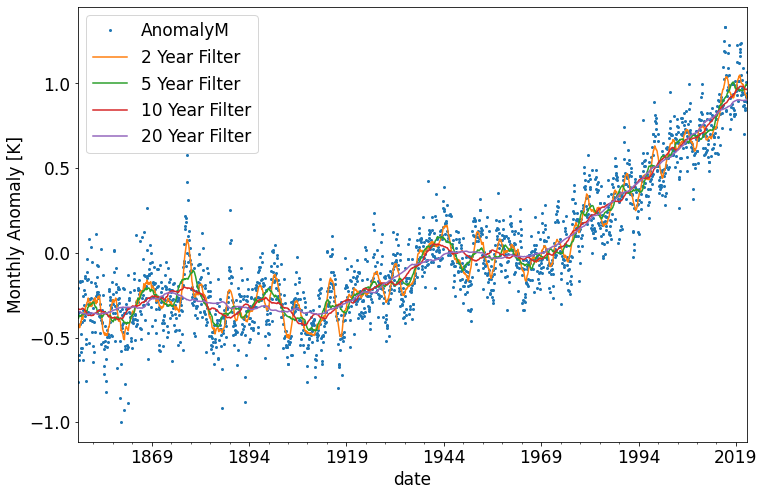

In [127]:
plt.clf()
fig = plt.figure(figsize=(12,8))
# Time series
ax = globalT.AnomalyM.plot(marker='o', ls='', ms=2)

# Filters
for nyear in [2,5,10,20]:
    getattr(globalT, f'filter{nyear}').plot(ax=ax, label=f'{nyear} Year Filter')

# Label
ax.set_ylabel('Monthly Anomaly [K]')
set_fontsize(ax,17)
ax.legend(fontsize=17)
plt.savefig('Problem5_multiyear.png', dpi=300)
plt.show()

## I would use 10 or 20 years to capture the overall trend of the data.   Shorter filters are too sensitive to variations that are on top of the overall trend.

## I think I favor 10 years but without a quantitative reason to prefer it.

----

# Problem 7 -- Linear trend Arctice sea-ice

## Load

In [87]:
arctic_ice = pandas.read_csv('../Data/Sept_Arctic_extent_1979-2021.csv')
arctic_ice.head()

,index,year,month,data-type,hemisphere,extent,area,rank
0,0,1979,9,Goddard,N,7.05,4.58,33.0
1,1,1980,9,Goddard,N,7.67,4.87,43.0
2,2,1981,9,Goddard,N,7.14,4.44,34.5
3,3,1982,9,Goddard,N,7.30,4.43,37.0
4,4,1983,9,Goddard,N,7.39,4.70,39.0


## Setup

In [88]:
x = arctic_ice.year.values
X = sm.add_constant(x)
Y = arctic_ice.extent.values

## Fit

In [89]:
arctic_model = sm.OLS(Y, X).fit()

In [91]:
predictions = arctic_model.predict(X) 

In [93]:
arctic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     157.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.25e-15
Time:                        10:40:21   Log-Likelihood:                -32.417
No. Observations:                  43   AIC:                             68.83
Df Residuals:                      41   BIC:                             72.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.4399     12.944     13.013      0.000     142.300     194.580
x1            -0.0812      0.006    -12.551      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.573   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.525
Skew:                          -0.324   Prob(JB):                        0.467
Kurtosis:                       3.656   Cond. No.                     3.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot

<Figure size 432x288 with 0 Axes>

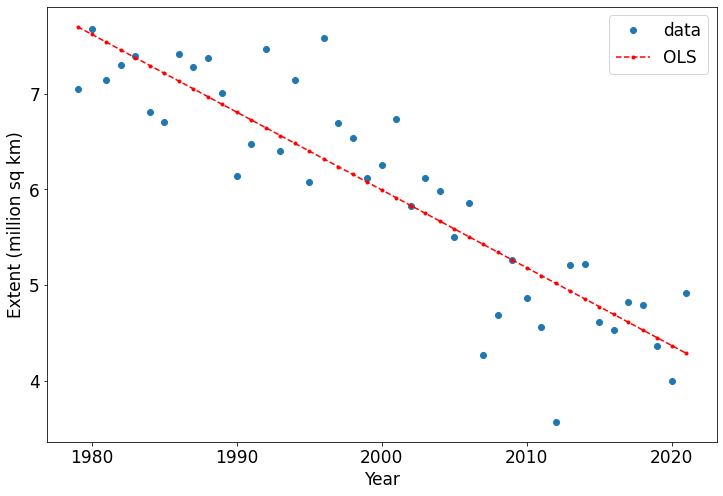

In [129]:
plt.clf()
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.plot(x, Y, "o", label="data")
#ax.plot(x, y_true, "b-", label="True")
ax.plot(x, arctic_model.fittedvalues, "r--.", label="OLS")
#ax.plot(x, iv_u, "r--")
#ax.plot(x, iv_l, "r--")
ax.legend(loc="best", fontsize=17)
ax.set_xlabel('Year', fontsize=17)
ax.set_ylabel('Extent (million sq km)', fontsize=17)
set_fontsize(ax, 17.)
#
plt.savefig('Problem7_arctic_linear.png', dpi=300)
plt.show()

# Problem 8 -- What is the trend?

In [103]:
arctic_ice.year.values[-1] - arctic_ice.year.values[0]

42

In [108]:
42 * arctic_model.params[1]

-3.4113742071882145

In [109]:
slope = arctic_model.params[1]
slope # million sq km / year

-0.0812231954092432

# Problem 9 -- Residuals

In [112]:
arctic_resid = arctic_model.fittedvalues-Y

## Plot

<Figure size 432x288 with 0 Axes>

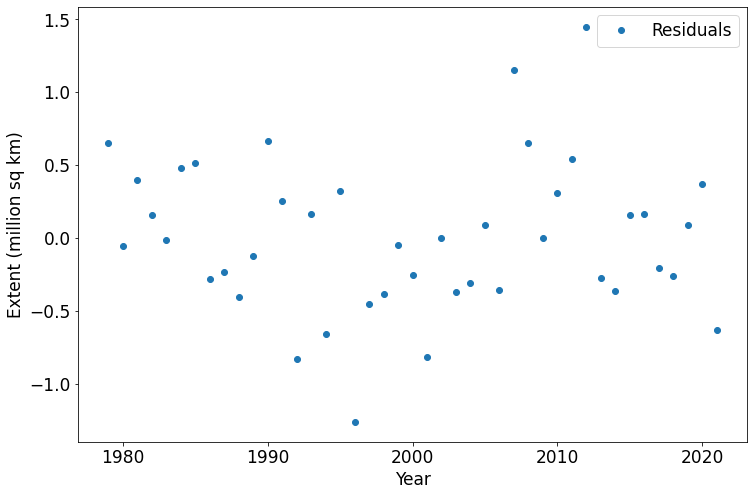

In [113]:
plt.clf()
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
#ax.plot(x, Y, "o", label="data")
#ax.plot(x, y_true, "b-", label="True")
ax.plot(x, arctic_resid, "o", label="Residuals")
#ax.plot(x, iv_u, "r--")
#ax.plot(x, iv_l, "r--")
ax.legend(loc="best", fontsize=17)
ax.set_xlabel('Year', fontsize=17)
ax.set_ylabel('Extent (million sq km)', fontsize=17)
set_fontsize(ax, 17.)
plt.show()

## Normal?

In [122]:
rms = np.std(arctic_resid)
rms

0.5142406653429431

In [123]:
bin_size = 0.25
area = arctic_resid.size * bin_size

## Gaussian

In [125]:
xval = np.linspace(-1.5,1.5,100)
yval = area * np.exp(-xval**2 / 2 / rms**2) / np.sqrt(2*np.pi*rms)

<Figure size 432x288 with 0 Axes>

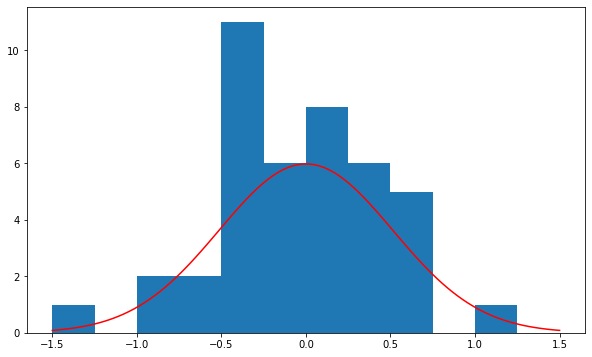

In [126]:
plt.clf()
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
ax.hist(arctic_resid, bins=-1.5 + bin_size*np.arange(12))
# Overplot a Gaussian
ax.plot(xval, yval, color='r')
plt.show()

## Assessment:

## Independence?  reasonably;  there is some structure to the residuals with time

## Normality?  Ok, but not great. Inner 30% is underpopulated

## Constant variance?  yes